## Zadanie 1
Proszę pobrać plik customers_mall.csv, zawierający informacje o klientach pewnego centrum handlowego. Pierwsza kolumna przedstawia ich zarobki (w tysiącach), w drugiej zaś znajduje się punktowa ocena wydatków (od 0 do 100) każdego z klientów.  Proszę dokonać klasteryzacji zbioru z użyciem algorytmu k-means. Uzyskane wyniki należy zwizualizować, ocenić i opisać. Wskazane jest zarekomendowanie odpowiedniej ilości klastrów.

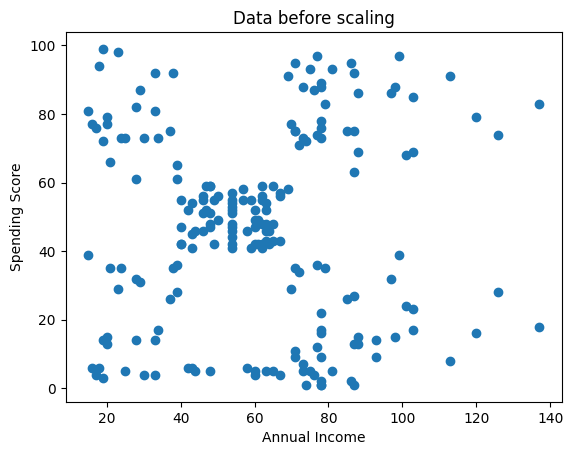

In [92]:
import pandas as pd
import matplotlib.pyplot as plt

# load data
data = pd.read_csv("data/customers_mall.csv", sep=";")


def plot_mall_data(data, title):
    plt.scatter(data[data.columns[0]], data[data.columns[1]])
    plt.xlabel(data.columns[0])
    plt.ylabel(data.columns[1])
    plt.title(title)


plot_mall_data(data, "Data before scaling")

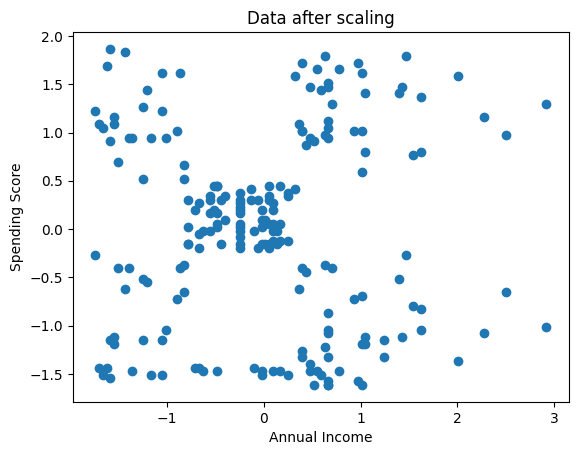

In [93]:
from sklearn.preprocessing import StandardScaler

# perform skaling
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

plot_mall_data(scaled_data, "Data after scaling")

In [94]:
from sklearn.cluster import KMeans

k_clusters = range(2, 11)

inertias = []
centres = []
labels = []
silhouettes = []
for k in k_clusters:
    model = KMeans(n_clusters=k)
    model.fit(scaled_data)
    inertias.append(model.inertia_)
    centres.append(model.cluster_centers_)
    labels.append(model.labels_)

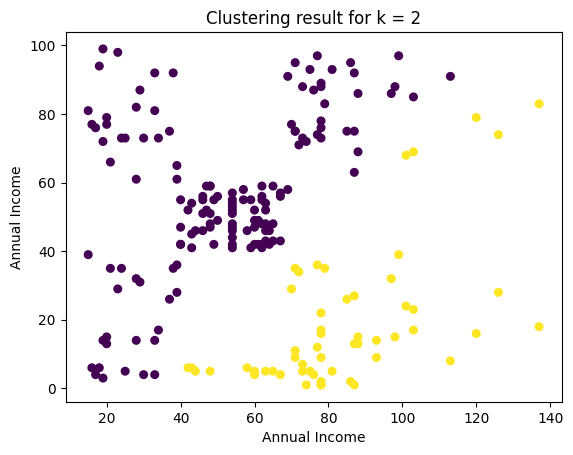

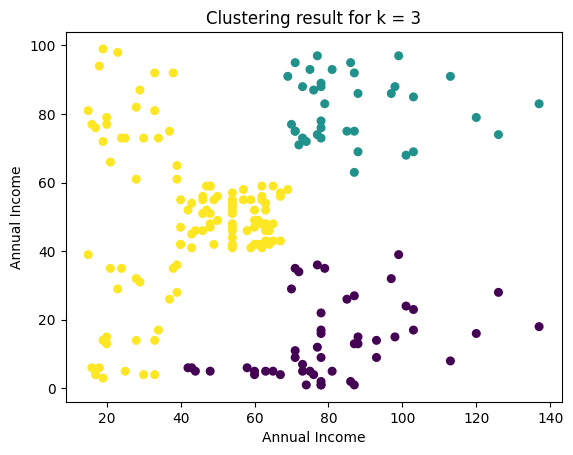

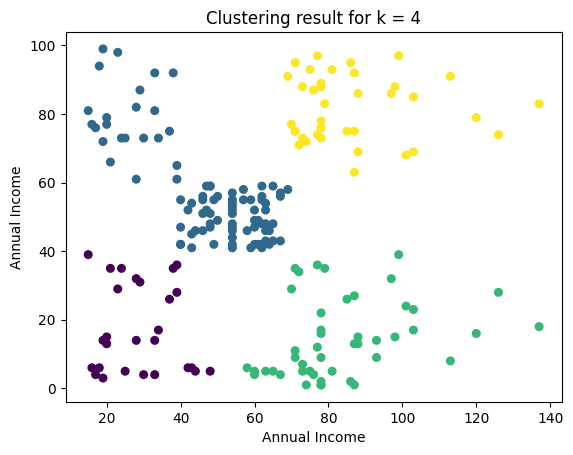

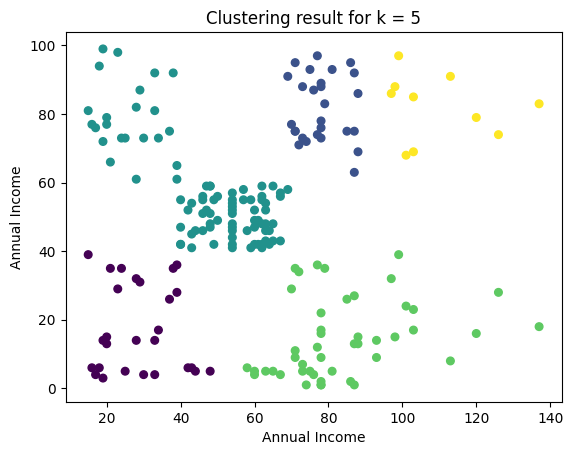

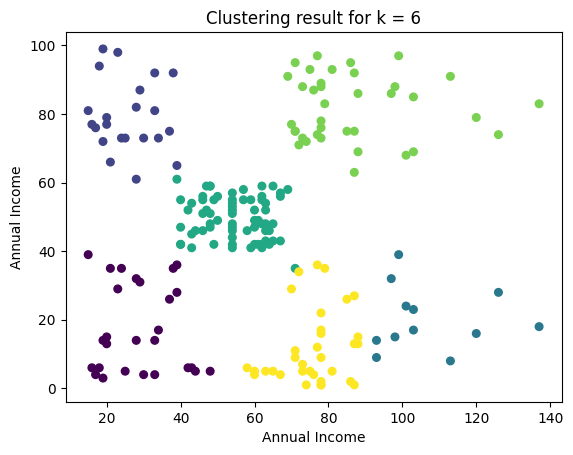

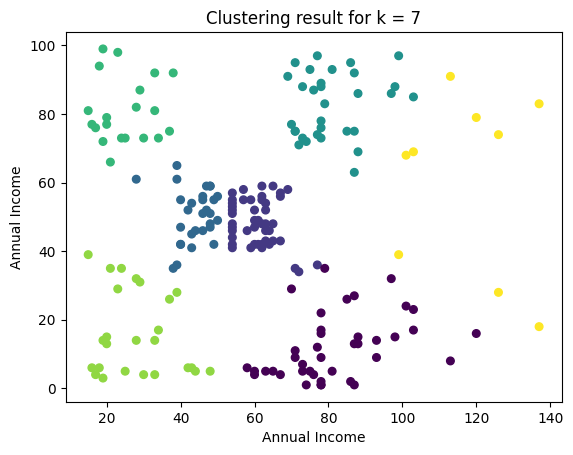

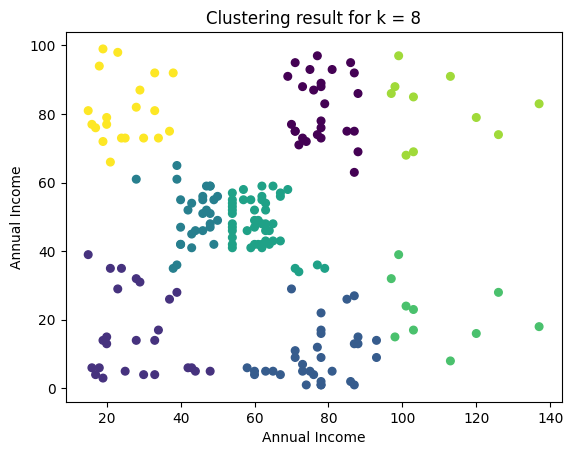

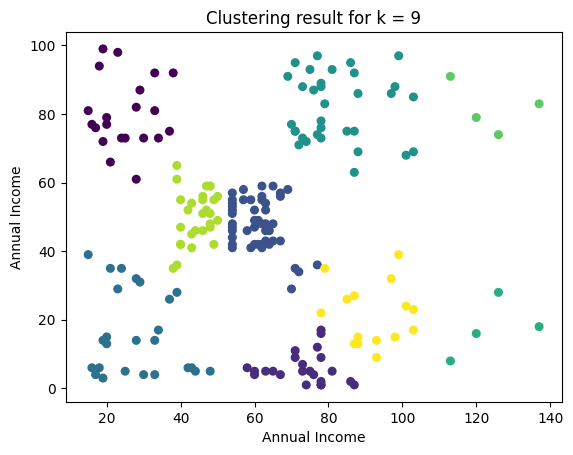

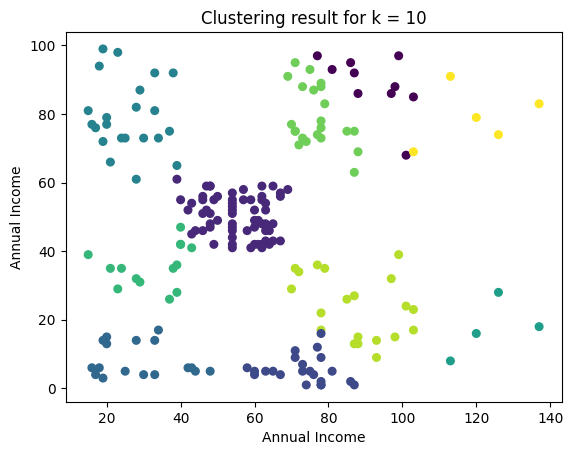

In [95]:
# plot

for idx, k in enumerate(k_clusters):
    plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=labels[idx], s=30)
    plt.xlabel(data.columns[0])
    plt.ylabel(data.columns[0])
    plt.title(f"Clustering result for k = {k}")
    plt.show()

In [96]:
# stats for each of the k-means clustering
from prettytable import PrettyTable
from sklearn import metrics

table = PrettyTable()
table.field_names = ["k", "Silhouette score", "Davies-Bouldin", "Calinski-Harabasz"]

for idx, k in enumerate(k_clusters):
    ss = metrics.silhouette_score(scaled_data, labels[idx])
    db = metrics.davies_bouldin_score(scaled_data, labels[idx])
    ch = metrics.calinski_harabasz_score(scaled_data, labels[idx])

    table.add_row([k, ss, db, ch])

print(table)

+----+---------------------+--------------------+--------------------+
| k  |   Silhouette score  |   Davies-Bouldin   | Calinski-Harabasz  |
+----+---------------------+--------------------+--------------------+
| 2  | 0.38106756111381274 | 1.0507001933047502 | 96.36984138506529  |
| 3  |  0.4493630225705114 | 0.7748484819999605 | 150.94434365321035 |
| 4  |  0.486004301106201  | 0.7222659519901746 | 179.5241028895941  |
| 5  |  0.4590097104622663 | 0.7392408283354269 | 154.22967208747968 |
| 6  |  0.525409416251277  | 0.6463647097146902 | 243.92609713415817 |
| 7  |  0.4552141942002313 | 0.7521802566954018 | 219.1631818934765  |
| 8  | 0.46261051275882614 | 0.7251077198799246 | 264.4129398329155  |
| 9  | 0.44706081864749886 | 0.6801660937113154 | 247.9721232823305  |
| 10 | 0.45639469908805486 | 0.8130176787778668 | 236.15706841637518 |
+----+---------------------+--------------------+--------------------+


/Users/zen1x/AGH/S6/MIO/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/zen1x/AGH/S6/MIO/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/zen1x/AGH/S6/MIO/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/zen1x/AGH/S6/MIO/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/zen1x/AGH/S6/MIO/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/zen1x/AGH/S6/MIO/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/zen1x/AGH/S6/MIO/.venv/lib/python3.13/site-packages/sklearn/utils/extma

## Zadanie 2
W pliku planets.csv mają państwo zbiór 778 spośród ponad 5000 znanych egzoplanet (planet pozasłonecznych) pozyskany z bazy danych NASA (https://exoplanetarchive.ipac.caltech.edu/index.html). Proszę dokonać klasteryzacji tego zbioru kilkoma sposobami, ocenić wyniki za pomocą odpowiednich metryk, wybrać dowolny z wyników i jego rezultaty (czym się charakteryzują klastry).

In [97]:
# data preparation
planets = pd.read_csv("data/planets.csv")


def remove_outliers_(df, col):
    mean = df[col].mean()
    std = df[col].std()
    lower_bound = mean - 3 * std
    upper_bound = mean + 3 * std
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


colnames = planets.columns[1:]
planets = planets.drop("pl_name", axis=1)

for colname in colnames:
    planets = remove_outliers_(planets, colname)

scaled_planets = StandardScaler().fit_transform(planets)

In [98]:
results = {}  # overall results

k_range = range(2, 9)

# k-means
kmeans_results = {}
for k in k_range:
    model = KMeans(n_clusters=k)
    labels = model.fit_predict(scaled_planets)
    sil = metrics.silhouette_score(scaled_planets, labels)
    db = metrics.davies_bouldin_score(scaled_planets, labels)
    ch = metrics.calinski_harabasz_score(scaled_planets, labels)
    kmeans_results[k] = {
        "labels": labels,
        "silhouette": sil,
        "davies_bouldin": db,
        "calinski_harabasz": ch,
    }

results["KMeans"] = kmeans_results

/Users/zen1x/AGH/S6/MIO/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/zen1x/AGH/S6/MIO/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/zen1x/AGH/S6/MIO/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/zen1x/AGH/S6/MIO/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/zen1x/AGH/S6/MIO/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/zen1x/AGH/S6/MIO/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/zen1x/AGH/S6/MIO/.venv/lib/python3.13/site-packages/sklearn/utils/extma

In [99]:
from sklearn.cluster import AgglomerativeClustering

# agglomerative
agglo_results = {}
for k in k_range:
    agglo = AgglomerativeClustering(n_clusters=k)
    labels_agglo = agglo.fit_predict(scaled_planets)
    sil_agglo = metrics.silhouette_score(scaled_planets, labels_agglo)
    db_agglo = metrics.davies_bouldin_score(scaled_planets, labels_agglo)
    ch_agglo = metrics.calinski_harabasz_score(scaled_planets, labels_agglo)
    agglo_results[k] = {
        "labels": labels_agglo,
        "silhouette": sil_agglo,
        "davies_bouldin": db_agglo,
        "calinski_harabasz": ch_agglo,
    }

results["Agglo"] = agglo_results

/Users/zen1x/AGH/S6/MIO/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/zen1x/AGH/S6/MIO/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/zen1x/AGH/S6/MIO/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/zen1x/AGH/S6/MIO/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/zen1x/AGH/S6/MIO/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/zen1x/AGH/S6/MIO/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/zen1x/AGH/S6/MIO/.venv/lib/python3.13/site-packages/sklearn/utils/extma

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np

dbscan = DBSCAN()
labels_dbscan = dbscan.fit_predict(scaled_planets)
# dbscan assigns -1 as the label for noise
if len(set(labels_dbscan)) > 1 and -1 not in set(labels_dbscan):
    sil_dbscan = metrics.silhouette_score(scaled_planets, labels_dbscan)
    db_dbscan = metrics.davies_bouldin_score(scaled_planets, labels_dbscan)
    ch_dbscan = metrics.calinski_harabasz_score(scaled_planets, labels_dbscan)
else:
    sil_dbscan, db_dbscan, ch_dbscan = np.nan, np.nan, np.nan

results["DBSCAN"] = [{
    "labels": labels_dbscan,
    "silhouette": sil_dbscan,
    "davies_bouldin": db_dbscan,
    "calinski_harabasz": ch_dbscan,
}]